### Домашнее задание "Проблема качества данных"

Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции. По образу практики, попробуйте создать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. Успеха!

In [1]:
import numpy as np 
import pandas as pd
import random
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

Создадим синтетический датасет с 4 переменными $(x_1, x_2, x_3, x_4)$, который может описать линейная модель.

In [2]:
X, y = make_classification(
    n_samples=1000, 
    n_features=4, 
    n_redundant=1,
    n_clusters_per_class=1,
    n_classes = 1,
    random_state=42
)

df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
a = [random.uniform(-1, 1),
     random.uniform(-1, 1),
     random.uniform(-1, 1),
     0]
random.shuffle(a)

def function(x1, x2, x3, x4):
    return a[0]*x1 + a[1]*x2 + a[2]*x3 + a[3]*x4
    
df['y'] = df.apply(lambda x: function(x['x1'], x['x2'], x['x3'], x['x4']), axis=1)
    
df.loc[df.index.isin(df.iloc[:10,:].index),'x1'] = np.nan
df.loc[df.index.isin(df.iloc[10:20,:].index),'x2'] = np.nan
df.loc[df.index.isin(df.iloc[20:30,:].index),'x3'] = np.nan
df.loc[df.index.isin(df.iloc[30:40,:].index),'x4'] = np.nan
df = df.sample(frac=1).reset_index(drop=True)
df.head(15)

,x1,x2,x3,x4,y
0,1.683052,-1.005210,0.783391,2.391789,1.146599
1,1.077038,-0.801352,-1.257578,1.665803,-0.821482
2,1.442797,NaN,-2.130566,2.029954,-1.370474
3,0.836930,-1.059994,-1.423957,1.668483,-1.212349
4,2.694066,0.027404,0.264020,2.428780,1.737712
5,-0.584960,-2.121240,-0.064188,1.281990,-1.336491
6,2.592160,-0.230077,-1.252393,2.556263,0.285430
7,2.540817,0.208488,-0.830444,2.134396,0.810458
8,2.679013,-0.015591,0.941311,2.451855,2.281367
9,0.769589,-0.975312,1.443632,1.534753,1.207637


In [3]:
df.info() # выведем информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      990 non-null    float64
 1   x2      990 non-null    float64
 2   x3      990 non-null    float64
 3   x4      990 non-null    float64
 4   y       1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


Видим, что у нас 4 переменных $(x_1, x_2, x_3, x_4)$ описывающих целевую метку $(y)$. Датасет имеет 1000 строк, в каждой переменной пропущено по 10 значений.

Посмотрим основные статистические характеристики переменных

In [4]:
df.describe()

,x1,x2,x3,x4,y
count,990.000000,990.000000,990.000000,990.000000,1000.000000
mean,1.029556,-0.973203,0.006583,1.768297,0.138512
std,1.179144,0.690072,0.977824,0.521650,1.267682
min,-2.472718,-3.087213,-3.019512,0.144483,-4.182335
25%,0.243050,-1.456630,-0.640442,1.425297,-0.770018
50%,0.980320,-0.979682,-0.000251,1.762705,0.148028
75%,1.831785,-0.500274,0.664255,2.125020,0.937618
max,5.471028,1.580069,3.926238,3.628356,4.837094


Данные по показателям $(x_1, x_2, x_3, x_4)$  можно заполнить значением моды, так как эти показатели не слишком вариативны и данные по ним практически заполнены.

In [5]:
df['x1'].fillna(df['x1'].mode()[0], inplace=True)
df['x1'].value_counts()

-2.472718    11
 0.781695     1
-1.293576     1
 1.683488     1
 0.378267     1
             ..
 1.572603     1
 1.859780     1
 0.231024     1
 0.575257     1
 1.534976     1
Name: x1, Length: 990, dtype: int64

In [6]:
df['x2'].fillna(df['x2'].mode()[0], inplace=True)
df['x2'].value_counts()

-3.087213    11
-0.825089     1
-1.035213     1
-1.178244     1
-1.390957     1
             ..
-0.965285     1
-2.237311     1
-0.662431     1
-1.153893     1
-2.193891     1
Name: x2, Length: 990, dtype: int64

In [7]:
df['x3'].fillna(df['x3'].mode()[0], inplace=True)
df['x3'].value_counts()

-3.019512    11
-1.058908     1
-0.535335     1
-0.456121     1
-1.042044     1
             ..
-0.926381     1
 0.874517     1
-1.585983     1
-0.012089     1
 0.457773     1
Name: x3, Length: 990, dtype: int64

In [8]:
df['x4'].fillna(df['x4'].mode()[0], inplace=True)
df['x4'].value_counts()

0.144483    11
1.688852     1
2.220244     1
2.585483     1
0.476928     1
            ..
1.790516     1
1.856653     1
1.669865     1
1.241879     1
1.281990     1
Name: x4, Length: 990, dtype: int64

Посмотрим, есть ли анамалии (выбросы) в данных

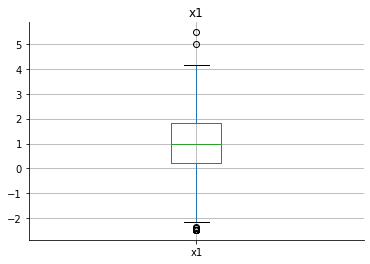

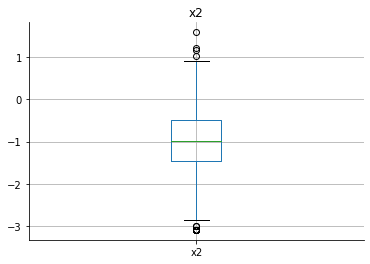

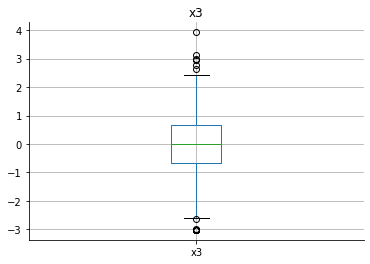

<AxesSubplot:title={'center':'x4'}>

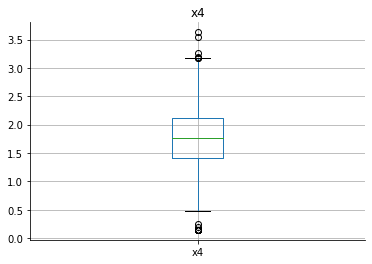

In [9]:
df['x1'].plot(kind='box',
                   title='x1', grid=True)
plt.show()

df['x2'].plot(kind='box',
                   title='x2', grid=True)
plt.show()

df['x3'].plot(kind='box',
                   title='x3', grid=True)
plt.show()

df['x4'].plot(kind='box',
                   title='x4', grid=True)


Переменные $x_1$ и $x_3$ имеют выбросы

In [10]:
import seaborn as sns

Посмотрим, как связаны между собой различные признаки в наборе данных

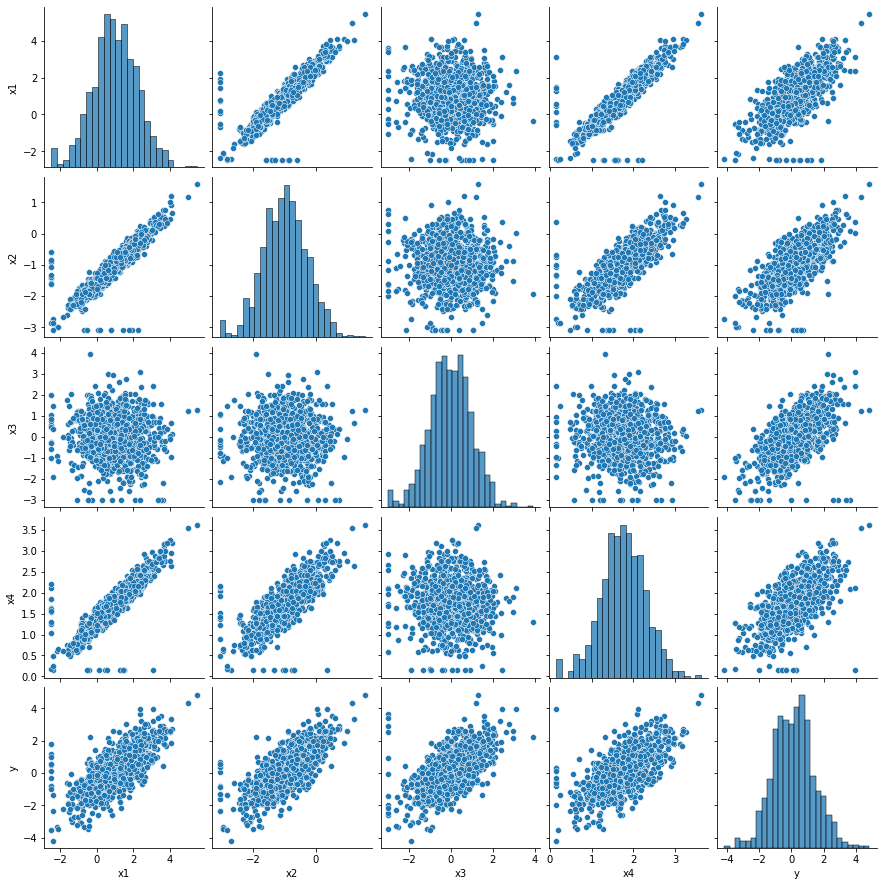

In [11]:
sns.pairplot(df)

<AxesSubplot:>

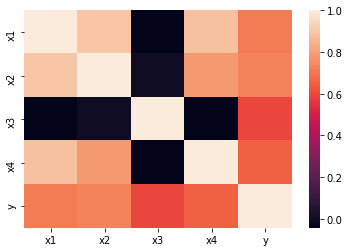

In [12]:
sns.heatmap(df.corr())

Построим модель линейной регрессии 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
X, y = df[['x1','x2','x3','x4']], df['y']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
model.coef_

array([0.31982389, 0.54534295, 0.79892914, 0.37863909])

In [18]:
model.intercept_

-0.28711771500002425

In [19]:
y_pred = model.predict(X_test)   # прогнозные данные модели
y_pred

array([-1.03053239e+00,  9.92582338e-01,  5.02506421e-01, -8.59567151e-01,
        1.20699486e-01, -5.37357695e-01,  3.77191777e+00, -3.18230961e-01,
       -1.71809631e+00,  1.99656849e+00, -1.35393530e+00, -1.53830324e+00,
        5.05165798e-01,  3.63895665e-01,  4.30587176e-01,  1.66896488e+00,
        1.41986222e+00, -2.21470282e-02,  5.78368271e-01, -2.24530688e-01,
        1.46667939e+00,  9.10022968e-01,  1.44981930e-01,  6.37339703e-01,
        1.44402962e+00,  1.36745141e-01,  1.03918847e+00,  2.50368446e+00,
        9.67124829e-01, -9.09268948e-01, -1.89757656e+00, -5.51003052e-01,
        4.91426032e-01,  8.18756937e-01, -8.51296001e-01, -1.56745812e+00,
       -1.31406871e+00, -2.11936963e+00,  1.45291558e+00, -5.08766037e-01,
        5.80283360e-01,  5.01195467e-01, -3.85842476e-01,  2.69445286e-01,
       -4.74012829e-01, -3.22474372e+00,  1.81093257e+00, -1.21693472e-01,
        8.94046464e-01, -5.18843179e-01, -2.72357825e+00,  3.88479424e-01,
        8.43544079e-01, -

In [20]:
# сравним пронозы, построенные моделью, с фактом
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,x1,x2,x3,x4,y_pred,y_test
521,0.664232,-1.136987,-1.167780,1.577146,-1.030532,-1.127237
737,1.723335,-0.351414,0.265878,1.869220,0.992582,1.027118
740,0.509616,-0.900591,0.814152,1.234204,0.502506,0.565225
660,0.573810,-1.248629,-0.847634,1.590335,-0.859567,-0.957882
411,1.481931,-0.622340,-0.549557,1.881228,0.120699,0.082384
...,...,...,...,...,...,...
468,1.286969,-0.702377,-0.848429,1.772229,-0.265350,-0.314586
935,3.266415,0.268452,0.692919,2.743565,2.496372,2.527443
428,-0.741002,-2.013385,-0.456121,1.047701,-1.589801,-1.705584
7,2.540817,0.208488,-0.830444,2.134396,0.783893,0.810458


In [21]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.9071486595748167

График остатков

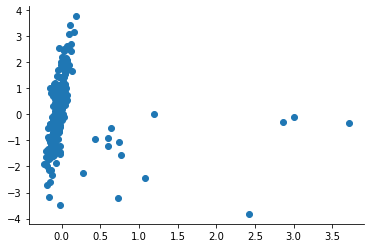

In [22]:
residuals = y_test - y_pred
plt.scatter(residuals, y_pred)

Альтернативный способ из statsmodel

In [23]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
X_const = sm.add_constant(X_train)

In [26]:
X_const.shape

(700, 5)

In [27]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2868.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:38:45   Log-Likelihood:                -157.56
No. Observations:                 700   AIC:                             325.1
Df Residuals:                     695   BIC:                             347.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2871      0.084     -3.424      0.0

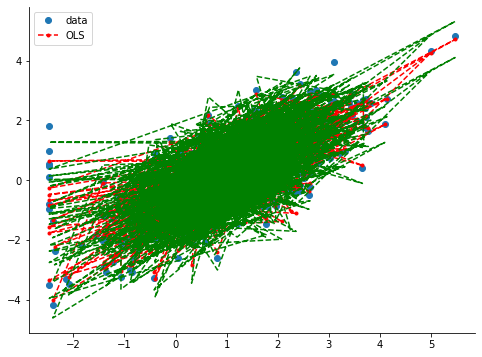

In [28]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

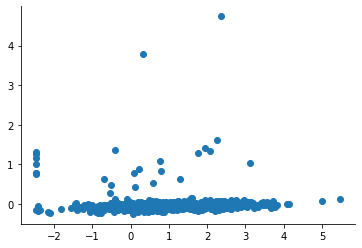

In [29]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([675.,   7.,   9.,   7.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([-0.24719358,  0.25135396,  0.74990149,  1.24844903,  1.74699656,
         2.24554409,  2.74409163,  3.24263916,  3.7411867 ,  4.23973423,
         4.73828176]),
 <BarContainer object of 10 artists>)

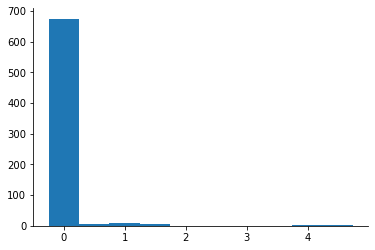

In [30]:
plt.hist(results.resid)